In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
with open("jin.json", "r", encoding="utf-8") as json_file:
    json_data = json.load(json_file)

In [60]:
data = []
for j in json_data['transaction']:
    sample = {'year':j['year'], 'month':j['month']}
    for a in j['amount']:
        sample[f"{a['type']}_total"] = a['total']
        sample[f"{a['type']}_normal"] = a['normal']
        sample[f"{a['type']}_public_transport"] = a['public_transport']
        sample[f"{a['type']}_cultural_cost"] = a['cultural_cost']
        sample[f"{a['type']}_traditional_market"] = a['traditional_market']
    data.append(sample)
data = pd.DataFrame(data)
data['total'] = data['신용카드_total'] + data['직불카드_total'] + data['현금영수증_total']
data.head()

,year,month,신용카드_total,신용카드_normal,신용카드_public_transport,신용카드_cultural_cost,신용카드_traditional_market,직불카드_total,직불카드_normal,직불카드_public_transport,직불카드_cultural_cost,직불카드_traditional_market,현금영수증_total,현금영수증_normal,현금영수증_public_transport,현금영수증_cultural_cost,현금영수증_traditional_market,total
0,2019,1,68450,0,68450,0,0,326390,318390,0,0,8000,0,0,0,0,0,394840
1,2019,2,55850,0,55850,0,0,343780,292780,27000,24000,0,0,0,0,0,0,399630
2,2019,3,76000,0,76000,0,0,512380,418180,94200,0,0,0,0,0,0,0,588380
3,2019,4,75000,0,75000,0,0,652650,652650,0,0,0,0,0,0,0,0,727650
4,2019,5,77000,0,77000,0,0,432480,432480,0,0,0,0,0,0,0,0,509480


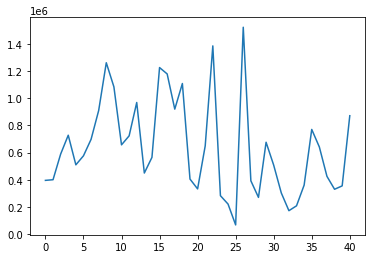

In [61]:
plt.plot(data['total'])

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data[['total']])
data_scale = pd.DataFrame(data_scale, columns=['x_t'])
data_scale.head()

,x_t
0,0.225352
1,0.228639
2,0.358185
3,0.453771
4,0.304033


In [63]:
time_step = 12
predict_time = 12
for t in range(1, predict_time+1):
    data_scale[f"y_t+{t}"] = data_scale['x_t'].shift(-t)
for t in range(time_step-1, -1, -1):
    data_scale[f"x_t-{t}"] = data_scale['x_t'].shift(t)
data_scale.head()

,x_t,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,x_t-9,x_t-8,x_t-7,x_t-6,x_t-5,x_t-4,x_t-3,x_t-2,x_t-1,x_t-0
0,0.225352,0.228639,0.358185,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225352
1,0.228639,0.358185,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225352,0.228639
2,0.358185,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225352,0.228639,0.358185
3,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,...,NaN,NaN,NaN,NaN,NaN,NaN,0.225352,0.228639,0.358185,0.453771
4,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489,...,NaN,NaN,NaN,NaN,NaN,0.225352,0.228639,0.358185,0.453771,0.304033


In [64]:
data_scale = data_scale.dropna(how='any')
data_scale.head()

,x_t,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,x_t-9,x_t-8,x_t-7,x_t-6,x_t-5,x_t-4,x_t-3,x_t-2,x_t-1,x_t-0
11,0.450484,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,...,0.358185,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484
12,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,...,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350
13,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,...,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489
14,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,0.147878,...,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489,0.341597
15,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,0.147878,0.105538,...,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489,0.341597,0.796025


In [65]:
total_data = data_scale.copy()

In [66]:
with open("giseong.json", "r", encoding="utf-8") as json_file:
    json_data = json.load(json_file)

In [67]:
data = []
for j in json_data['transaction']:
    sample = {'year':j['year'], 'month':j['month']}
    for a in j['amount']:
        sample[f"{a['type']}_total"] = a['total']
        sample[f"{a['type']}_normal"] = a['normal']
        sample[f"{a['type']}_public_transport"] = a['public_transport']
        sample[f"{a['type']}_cultural_cost"] = a['cultural_cost']
        sample[f"{a['type']}_traditional_market"] = a['traditional_market']
    data.append(sample)
data = pd.DataFrame(data)
data['total'] = data['신용카드_total'] + data['직불카드_total'] + data['현금영수증_total']
data.head()

,year,month,신용카드_total,신용카드_normal,신용카드_public_transport,신용카드_cultural_cost,신용카드_traditional_market,직불카드_total,직불카드_normal,직불카드_public_transport,직불카드_cultural_cost,직불카드_traditional_market,현금영수증_total,현금영수증_normal,현금영수증_public_transport,현금영수증_cultural_cost,현금영수증_traditional_market,total
0,2019,1,30450,0,30450,0,0,1072401,1072401,0,0,0,139160,139160,0,0,0,1242011
1,2019,2,278950,191800,87150,0,0,804355,804355,0,0,0,139160,139160,0,0,0,1222465
2,2019,3,713070,650470,62600,0,0,1280600,1280600,0,0,0,139160,139160,0,0,0,2132830
3,2019,4,333400,270450,62950,0,0,556720,516920,39800,0,0,140660,140660,0,0,0,1030780
4,2019,5,486920,418520,68400,0,0,326250,326250,0,0,0,290560,201560,0,89000,0,1103730


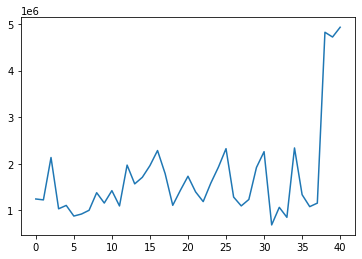

In [68]:
plt.plot(data['total'])

In [69]:
data_scale = scaler.transform(data[['total']])
data_scale = pd.DataFrame(data_scale, columns=['x_t'])
data_scale.head()

,x_t
0,0.806796
1,0.793381
2,1.418198
3,0.661821
4,0.711889


In [70]:
time_step = 12
predict_time = 12
for t in range(1, predict_time+1):
    data_scale[f"y_t+{t}"] = data_scale['x_t'].shift(-t)
for t in range(time_step-1, -1, -1):
    data_scale[f"x_t-{t}"] = data_scale['x_t'].shift(t)
data_scale.head()

,x_t,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,x_t-9,x_t-8,x_t-7,x_t-6,x_t-5,x_t-4,x_t-3,x_t-2,x_t-1,x_t-0
0,0.806796,0.793381,1.418198,0.661821,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806796
1,0.793381,1.418198,0.661821,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806796,0.793381
2,1.418198,0.661821,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806796,0.793381,1.418198
3,0.661821,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037,1.306402,...,NaN,NaN,NaN,NaN,NaN,NaN,0.806796,0.793381,1.418198,0.661821
4,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037,1.306402,1.029508,...,NaN,NaN,NaN,NaN,NaN,0.806796,0.793381,1.418198,0.661821,0.711889


In [71]:
data_scale = data_scale.dropna(how='any')
data_scale.head()

,x_t,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,x_t-9,x_t-8,x_t-7,x_t-6,x_t-5,x_t-4,x_t-3,x_t-2,x_t-1,x_t-0
11,0.704037,1.306402,1.029508,1.126292,1.298764,1.521266,1.180211,0.713255,0.934095,1.141803,...,1.418198,0.661821,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037
12,1.306402,1.029508,1.126292,1.298764,1.521266,1.180211,0.713255,0.934095,1.141803,0.911717,...,0.661821,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037,1.306402
13,1.029508,1.126292,1.298764,1.521266,1.180211,0.713255,0.934095,1.141803,0.911717,0.767926,...,0.711889,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037,1.306402,1.029508
14,1.126292,1.298764,1.521266,1.180211,0.713255,0.934095,1.141803,0.911717,0.767926,1.040402,...,0.554931,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037,1.306402,1.029508,1.126292
15,1.298764,1.521266,1.180211,0.713255,0.934095,1.141803,0.911717,0.767926,1.040402,1.276396,...,0.584532,0.639914,0.899382,0.746786,0.929856,0.704037,1.306402,1.029508,1.126292,1.298764


In [72]:
total_data = pd.concat([total_data, data_scale], axis=0)
total_data

,x_t,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,x_t-9,x_t-8,x_t-7,x_t-6,x_t-5,x_t-4,x_t-3,x_t-2,x_t-1,x_t-0
11,0.450484,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,...,0.358185,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484
12,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,...,0.453771,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350
13,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,...,0.304033,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489
14,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,0.147878,...,0.349558,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489,0.341597
15,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,0.147878,0.105538,...,0.432969,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489,0.341597,0.796025
16,0.763773,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,0.147878,0.105538,0.000000,...,0.578939,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489,0.341597,0.796025,0.763773
17,0.585761,0.715334,0.231968,0.182209,0.399839,0.905642,0.147878,0.105538,0.000000,1.000000,...,0.820406,0.698485,0.405110,0.450484,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761
18,0.715334,0.231968,0.182209,0.399839,0.905642,0.147878,0.105538,0.000000,1.000000,0.223183,...,0.698485,0.405110,0.450484,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334
19,0.231968,0.182209,0.399839,0.905642,0.147878,0.105538,0.000000,1.000000,0.223183,0.139223,...,0.405110,0.450484,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968
20,0.182209,0.399839,0.905642,0.147878,0.105538,0.000000,1.000000,0.223183,0.139223,0.418157,...,0.450484,0.619350,0.262489,0.341597,0.796025,0.763773,0.585761,0.715334,0.231968,0.182209


In [74]:
s = int(total_data.shape[0]*0.8)
X_train = total_data.iloc[:s,predict_time+1:].values
y_train = total_data.iloc[:s,1:predict_time+1].values
X_test = total_data.iloc[s:,predict_time+1:].values
y_test = total_data.iloc[s:,1:predict_time+1].values

X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(28, 12, 1) (28, 12)
(8, 12, 1) (8, 12)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def R2(y_true, y_pred):
    return tf.py_function(func=r2_score, inp=(y_true, y_pred), Tout=tf.float32)
es = EarlyStopping(monitor='val_loss', patience=100)
mc = ModelCheckpoint(filepath='./model/model.h5',
                    monitor='val_loss', 
                    verbose=1,
                    save_best_only=True)

model = Sequential()
model.add(LSTM(128, input_shape=(time_step, 1)))
model.add(Dense(12, activation='linear'))

model.compile(loss='mse',
              optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_3 (Dense)              (None, 12)                1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train, y_train,
          epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[es, mc])

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5509 - val_loss: 1.5445

Epoch 00001: val_loss improved from inf to 1.54446, saving model to ./model\model.h5
Epoch 2/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.5174 - val_loss: 1.4682

Epoch 00002: val_loss improved from 1.54446 to 1.46817, saving model to ./model\model.h5
Epoch 3/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4848 - val_loss: 1.3916

Epoch 00003: val_loss improved from 1.46817 to 1.39157, saving model to ./model\model.h5
Epoch 4/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.4524 - val_loss: 1.3126

Epoch 00004: val_loss improved from 1.39157 to 1.31260, saving model to ./model\model.h5
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4194 - val_loss: 1.2291

Epoch 00005: val_loss improved from 1.31260 to 1.22909, saving model to ./model\model.h5
Epoch 6/1000
1/1 [==============================] - 0s 19ms/s

In [77]:
from tensorflow.keras.models import load_model

model = load_model('./model/model.h5')

In [80]:
result = pd.DataFrame(scaler.inverse_transform(model.predict(X_test)), columns=[f'y_pred_t+{t}' for t in range(1, predict_time+1)])
result

,y_pred_t+1,y_pred_t+2,y_pred_t+3,y_pred_t+4,y_pred_t+5,y_pred_t+6,y_pred_t+7,y_pred_t+8,y_pred_t+9,y_pred_t+10,y_pred_t+11,y_pred_t+12
0,1843537.000,1764755.375,1920970.250,1725409.750,1697904.125,1771277.500,1447925.125,1645902.250,1622965.000,1687028.875,1746127.375,1538999.125
1,1843831.875,1780871.500,1922423.625,1714733.375,1692896.125,1773818.500,1455384.625,1654082.250,1637994.375,1687738.750,1749974.875,1536645.375
2,1859120.250,1827738.750,1952171.125,1742177.625,1726433.625,1806073.000,1487418.750,1692163.875,1663938.125,1717664.250,1787322.625,1557586.125
3,1830832.125,1789246.000,1920393.375,1734330.375,1708960.750,1774341.375,1461969.125,1665250.125,1627174.875,1694606.125,1758413.250,1537212.500
4,1847728.375,1796217.375,1944735.625,1775408.750,1742612.000,1795072.750,1470008.000,1675905.250,1625359.500,1714757.125,1778094.625,1560692.000
5,1861917.750,1781621.750,1949008.375,1757615.000,1720868.625,1788545.875,1455571.000,1654965.625,1637064.750,1702737.125,1760505.000,1561292.500
6,1825541.750,1746452.000,1898362.000,1701696.125,1670537.500,1745052.250,1428506.875,1623369.500,1612694.375,1664318.375,1719682.125,1518933.875
7,1755545.500,1672233.375,1811555.375,1629436.125,1598313.125,1667927.750,1376300.250,1564519.625,1551234.750,1599374.875,1648396.625,1451827.250


In [82]:
pd.DataFrame(scaler.inverse_transform(y_test), columns=[f'y_test_t+{t}' for t in range(1, predict_time+1)])

,y_test_t+1,y_test_t+2,y_test_t+3,y_test_t+4,y_test_t+5,y_test_t+6,y_test_t+7,y_test_t+8,y_test_t+9,y_test_t+10,y_test_t+11,y_test_t+12
0,1185377.0,1582377.0,1926223.0,2323053.0,1282904.0,1093243.0,1231250.0,1918608.0,2258749.0,684675.0,1062477.0,847730.0
1,1582377.0,1926223.0,2323053.0,1282904.0,1093243.0,1231250.0,1918608.0,2258749.0,684675.0,1062477.0,847730.0,2338580.0
2,1926223.0,2323053.0,1282904.0,1093243.0,1231250.0,1918608.0,2258749.0,684675.0,1062477.0,847730.0,2338580.0,1334099.0
3,2323053.0,1282904.0,1093243.0,1231250.0,1918608.0,2258749.0,684675.0,1062477.0,847730.0,2338580.0,1334099.0,1077256.0
4,1282904.0,1093243.0,1231250.0,1918608.0,2258749.0,684675.0,1062477.0,847730.0,2338580.0,1334099.0,1077256.0,1153080.0
5,1093243.0,1231250.0,1918608.0,2258749.0,684675.0,1062477.0,847730.0,2338580.0,1334099.0,1077256.0,1153080.0,4824400.0
6,1231250.0,1918608.0,2258749.0,684675.0,1062477.0,847730.0,2338580.0,1334099.0,1077256.0,1153080.0,4824400.0,4722040.0
7,1918608.0,2258749.0,684675.0,1062477.0,847730.0,2338580.0,1334099.0,1077256.0,1153080.0,4824400.0,4722040.0,4932100.0
